# ANALISIS E INSIGHTS

Llegamos a la parte más importante, donde vamos a intentar obtener conclusiones relevantes para el objetivo utilizando todo el trabajo de preparación que hemos hecho, las técnicas de Business Analytics que ya conocemos y además vamos a aprender a crear una visualización en mapa.

Para ello empezaremos dando respuesta a las preguntas semilla y es probable que en el proceso nos vayan surgiendo hallazgos interesantes que nos lleven a nuevas preguntas o a la aplicación de ciertas técnicas.

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

## CARGA DE DATOS

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accomodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,2,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín,60.0,50,01_Una,0-2,1,-695,50,178430.0,5.032039
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina,31.0,0,01_Una,0-2,1,5-48,50,79345.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,5,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela,50.0,39,03_Tres,4-16,3-23,0-4,90,257355.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro,92.0,68,01_Una,0-2,1,5-48,50,168945.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela,26.0,4,01_Una,0-2,1,-695,50,142975.0,3.200942


## ANALISIS

### Analisis sobre el precio

**¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?**

**¿Cual es el ranking de distritos y barrios por precio medio de alquiler?**

In [3]:
df.precio_total.describe()

count    17710.000000
mean       149.027770
std        523.211567
min         20.000000
25%         43.000000
50%         70.000000
75%        112.000000
max      22400.000000
Name: precio_total, dtype: float64

Vemos que hay al menos un atípico por la parte de arriba que sesga la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [4]:
df.precio_total.median()

70.0

In [5]:
df.groupby('distrito').precio_total.median().sort_values(ascending = False)

distrito
San Blas - Canillejas    90.0
Salamanca                88.0
Centro                   76.0
Chamartín                74.0
Chamberí                 70.0
Hortaleza                69.0
Retiro                   68.0
Tetuán                   66.0
Moncloa - Aravaca        61.0
Fuencarral - El Pardo    60.0
Arganzuela               58.0
Vicálvaro                53.0
Ciudad Lineal            50.0
Barajas                  49.5
Carabanchel              48.0
Villa de Vallecas        47.5
Latina                   47.0
Usera                    42.0
Villaverde               42.0
Moratalaz                40.0
Puente de Vallecas       40.0
Name: precio_total, dtype: float64

Nos llama la atención el dato de San Blas, vamos a verlo con más detalle a ver qué está pasando.

In [6]:
df.loc[df.distrito == 'San Blas - Canillejas'].sort_values('precio_total',ascending = False).head(10)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accomodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
9290,9290,9290,34600594,3 rooms near Wanda,38951538,San Blas - Canillejas,Arcos,40.42105,-3.61457,Private room,2800,1,2,0,3 rooms 15´walking from Wanda.,f,6,3.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,9800.0,100,03_Tres,4-16,3-23,0-4,90,163233.0,7.532233
9662,9662,9662,34826962,Pozos rooms,222068421,San Blas - Canillejas,Arcos,40.41927,-3.61555,Private room,3000,1,1,88,Cerca nos podemos encontrar un centro comercia...,f,4,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6300.0,75,02_Dos,3,2,0-4,70,126959.0,7.439364
10189,10189,10189,35149419,CHALET FOR THE FINAL CHAMPIONS LEAGUE MADRID,143732655,San Blas - Canillejas,Canillejas,40.44937,-3.61633,Entire home/apt,6000,1,1,365,We are talking about one of the last villas fo...,f,6,4.0,5.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,6000.0,0,04_Cuatro_o_mas,4-16,3-23,0-4,120,217644.0,8.212429
9668,9668,9668,34833756,Wanda Champions Final,29628177,San Blas - Canillejas,Rosas,40.42622,-3.60502,Private room,2700,1,1,0,Somos una pareja joven educados y muy sociable...,f,5,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,5670.0,100,02_Dos,4-16,2,0-4,70,126959.0,8.391922
9878,9878,9878,34970236,Habitaciones cerca Wanda Metropolitano (Champi...,263474389,San Blas - Canillejas,Arcos,40.41920,-3.61229,Private room,800,1,1,88,"Se alquilan 5 habitaciones, cada una para 2 hu...",f,10,5.0,8.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4480.0,75,04_Cuatro_o_mas,4-16,3-23,0-4,150,272055.0,7.714952
9748,9748,9748,34882596,2 rooms near wanda,38951538,San Blas - Canillejas,Arcos,40.41948,-3.61427,Private room,1500,1,2,363,2 rooms near Wanda stadium (20' walking) with ...,f,4,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,02_Dos,3,3-23,0-4,70,126959.0,7.548577
9173,9173,9173,34522997,Beautiful Penthouse next to Wanda Metropolitano,260551569,San Blas - Canillejas,Canillejas,40.43686,-3.61093,Private room,2000,1,1,0,Wonderful penthouse in a lovely duplex next to...,f,4,1.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,100,01_Una,3,2,0-4,50,90685.0,8.138310
9831,9831,9831,34933116,FINAL CHAMPIONS LEAGUE MADRID,263232278,San Blas - Canillejas,Simancas,40.43968,-3.61933,Private room,2000,2,1,365,Near (15 minutes walking) to WANDA STADIUM.<br...,f,5,3.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,0,03_Tres,4-16,2,0-4,90,163233.0,7.557076
10092,10092,10092,35091283,FINAL CHAMPIONS LEAGUE,264225539,San Blas - Canillejas,Rejas,40.44592,-3.58746,Private room,1000,1,1,180,"Desayuno, comida y cena incluida. Traslados al...",f,6,2.0,6.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,4200.0,50,02_Dos,4-16,3-23,0-4,70,126959.0,10.334061
10404,10404,10404,35251141,Se alquila para final de la champion league,265376740,San Blas - Canillejas,Canillejas,40.44292,-3.60764,Entire home/apt,3000,1,1,365,None,f,1,2.0,4.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,3000.0,0,02_Dos,0-2,3-23,0-4,70,126959.0,8.610212


Vemos que son precios en el entorno de los 3.000 - 5.000 euros!

Al leer la descripción nos damos cuenta de todos estos precios están definidos por la final de la Champions League.

Lo cual es un insight interesante: 

**Insight 1: pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos o espectáculos**

¿Tendría sentido generar un producto de alquiler que consista en alquilar de forma "normal" a un precio inferior al mercado con la condición de que el inquilino deje el piso libre para alquilarlo "turísticamente" en fechas señaladas?

En el resto no hay sorpresas, con distritos como Salamanca, Centro o Chanmartín a la cabeza.

Pero por ejemplo vemos que la diferencia de precio media entre Retiro y Tetuán es muy baja.

Esto nos lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

In [7]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
distrito,,
Arganzuela,58.0,142975.0
Barajas,49.5,119315.0
Carabanchel,48.0,74305.0
Centro,76.0,168945.0
Chamartín,74.0,178430.0
Chamberí,70.0,188335.0
Ciudad Lineal,50.0,102900.0
Fuencarral - El Pardo,60.0,124880.0
Hortaleza,69.0,135485.0


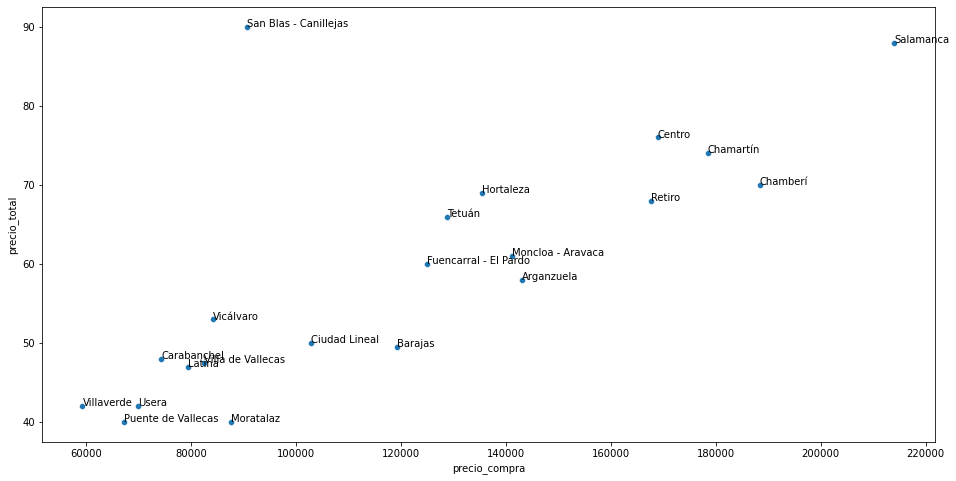

In [8]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

Y la excepción de San Blas que ya sabemos por qué es.

Por tanto como era esperable no hay a priori ningún "chollo" claro a este nivel.

Vamos a repetir el análisis a nivel de barrio a ver si identificamos algo.

In [9]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood,,
Abrantes,35.5,74305.0
Acacias,53.8,142975.0
Adelfas,54.0,234612.0
Aeropuerto,41.3,119315.0
Aguilas,47.0,79345.0
...,...,...
Valverde,62.5,124880.0
Ventas,42.0,102900.0
Vinateros,50.0,87500.0


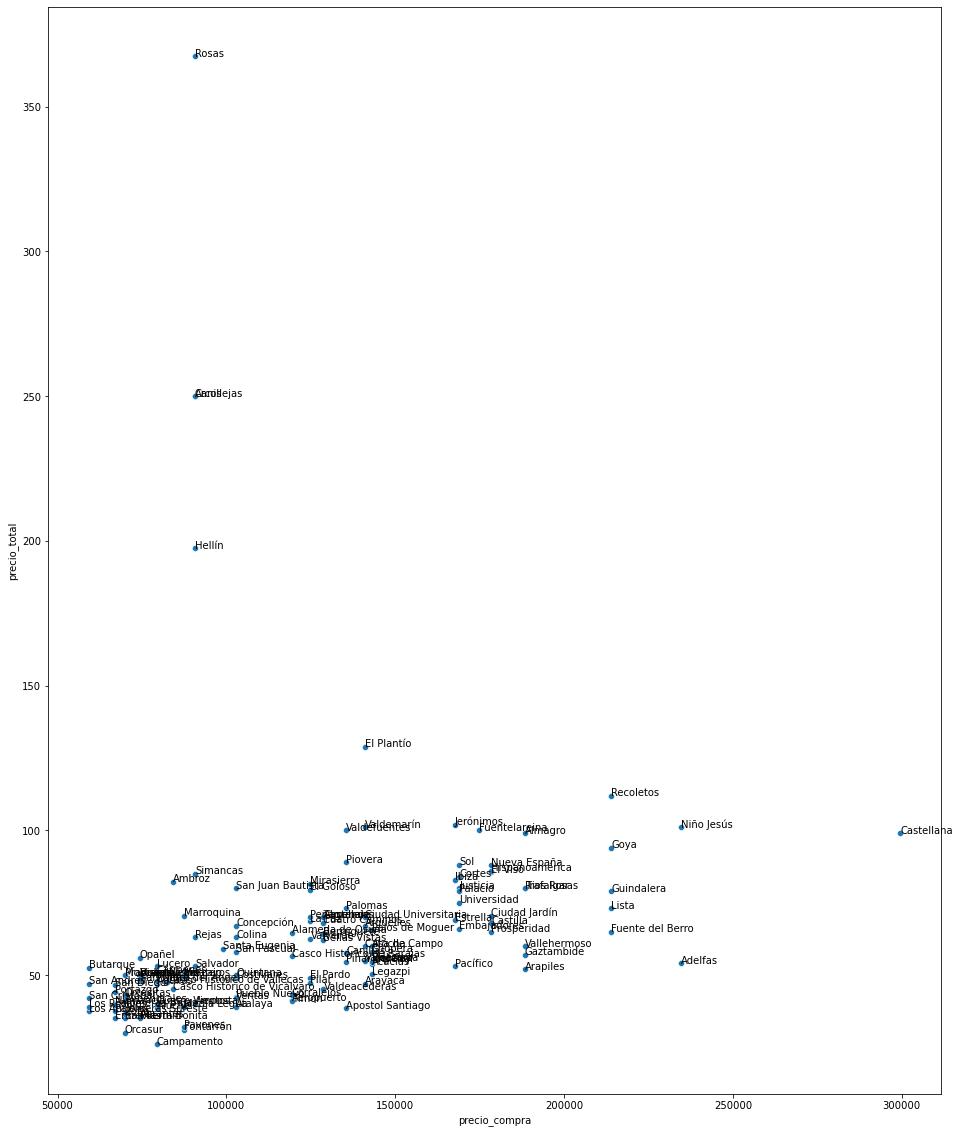

In [10]:
plt.figure(figsize = (16,20))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

A este nivel ya vemos más cosas:

* 3 barrios que sobresalen, posiblemente los 3 sean de San Blas
* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
    * Bajo: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Medio: El Plantio, Valdemarín, Valdefuentes
    * Medio-alto: Jerónimos, Fuentela reina
    * Alto: Recoletos
    
**Insight 2: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

In [11]:
df.loc[df.neighbourhood.isin(['Rosas','Canillejas','Hellin']),'distrito'].unique()

array(['San Blas - Canillejas'], dtype=object)

**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

Para responder a esta pregunta podemos construir un minicubo, ya que hemos discretizado nuestras variables de análisis.

In [12]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

KeyError: "['accommodates_disc'] not in index"

In [ ]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

In [ ]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

Sobre el minicubo vamos analizando cada variable.

In [ ]:
minicubo_precio.loc['bedrooms_disc']

In [ ]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color = 'green');

En cuanto al número de habitaciones no hay nada que destacar.

Existe una relación casi perfecta entre el precio de compra y el precio total que se puede cobrar.

Parte de este efecto puede ser artificial, ya que usamos el número de habitaciones para calcular el precio total como el precio de compra.

In [ ]:
minicubo_precio.loc['beds_disc']

In [ ]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green');

En cuanto al número de camas sí hay una conclusión:

**Insight 3: el número de camas a evitar es 2**. O bien ponemos una cama o intentamos meter todas las posibles.

Dado que no había este efecto en el número de habitaciones ¿podría ser que los propietarios estén intentando meter muchas más camas que habitaciones para maximizar el ingreso?

Veámoslo por ejemplo con los pisos de una habitación:

In [ ]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot();

Efectivamente aquí hay algo, ya que figura que para pisos de una habitación hay gente que está metiendo hasta decenas de camas!

Sería un tema a explorar con más detalle y comentar con alguien que conozca el negocio.

Vamos a ver unos ejemplos:

In [ ]:
df.loc[(df.bedrooms == 1)& (df.beds > 8)]

Vamos a analizar ahora por el número de huéspedes que aceptan

In [ ]:
minicubo_precio.loc['accommodates_disc']

In [ ]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

**Insight 4: el número óptimo de huéspedes está en 3, ya el precio de los inmuebles para acomodar 3 es el mismo que para acomodar 1 o 2. A partir de 4 el piso necesita ser mayor y el precio de compra se incrementa bastante**

Por último vamos a analizar la variable que hemos construído de cercanía a un punto de interés para ver si tiene efecto sobre el precio de las habitaciones.

En una situación real hubiéramos construído muchas de este tipo, y repetido el análisis con todas.

En este caso como hemos construído la distancia a la Puerta del Sol vamos a evaluar solo los distritos para lo que esto puede ser relevante, es decir los más céntricos.

Para ello primero vamos a calcular la distancia media por distrito y elegir un punto de corte.

In [ ]:
df.groupby('distrito').pdi_sol.median().sort_values()

Vamos a cortar en Latina incluído.

Y sobre esa selección vamos a visualizar con un scatter.

In [ ]:
df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

In [ ]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

No parece haber una relación tan directa como sería esperable entre la distancia a la Puerta del Sol y el precio de alquiler.

**Insight 5: estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del PdI y por tanto esperablmente tengan un precio de compra menor**

### Analisis sobre la ocupación

Para este punto podríamos repetir exactamente los mismos análisis que con el precio pero cambiando la variable precio por la de ocupación que habíamos construido.

Dado que sería igual no vamos a desarrollarlo y te lo dejo como tarea para que practiques e intentes obtener tus primeros insights.

En su lugar prefiero el tiempo para enseñarte cómo podemos incluir análisis sobre un mapa, dado que en este caso sería algo muy relevante y es un tipo de análisis que siempre gusta mucho.

### Analisis geográfico sobre un mapa

El análisis geográfico es una disciplina en si misma y de bastante complejidad.

Pero afortunadamente hay una alternativa en Python que lo hace muy sencillo y cubre todo lo que necesitamos de forma práctica para nuestro fin.

Es un paquete que se llama Folium y es una implementación de la tecnología Leaflet en Python.

Lo único que necesitamos para usarlo es tener las coordenadas de latitud y longitud.

**Instalación:**

conda install -c conda-forge folium

**Importación:**

import folium

**Documentación:**

https://python-visualization.github.io/folium/index.html

In [14]:
import folium

Con folium no es necesario instalar mapas, ya los trae por defecto, lo único que tenemos que hacer para inicializar un mapa es pasarle las coordenadas de inicio y opcionalmente un nivel de zoom.

Vamos a usar las coordenadas de la Puerta del Sol que ya teníamos.

In [15]:
folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

Por ejemplo vamos a analizar visualmente el insight sobre el distrito de San Blas.

In [16]:
datos = df[df.distrito == 'San Blas - Canillejas'].copy()

Para representar los marcadores de todos los pisos tenemos que crear un bucle para ir añadiéndolos al mapa.

In [17]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(datos)):
   folium.Marker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
   ).add_to(mapa)

mapa

Esta representación está bien, pero tenemos que ir haciendo click en cada uno para ver el precio.

Sería más fácil si tuviéramos un código de colores que nos indicara visualmente el rango de precio.

Para ello vamos a crear una nueva variable discretizada y cambiaremos el marcador a un círculo de colores.

In [83]:
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [84]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

**Insight 6: Existen todavía muchos puntos amarillos y naranjas, lo cual puede indicar que todavía existe potencial para explotar más el factor de los eventos deportivos**